In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("employee_churn_data.csv")
df

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no
...,...,...,...,...,...,...,...,...,...,...
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes


## Key insights - 1 

Almost 30% of staff have churned in the last 24 months, leading to skill and knowledge gaps across all departments,

In [2]:
import seaborn as sns
df["left"].value_counts(normalize=True)

no     0.708176
yes    0.291824
Name: left, dtype: float64

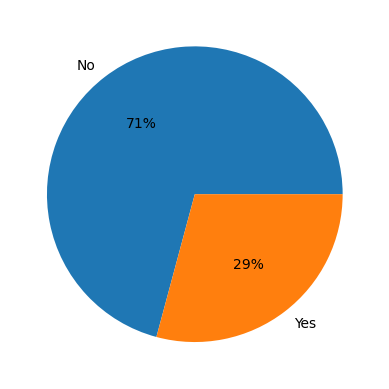

In [3]:
import matplotlib.pyplot as plt
plt.pie(df['left'].value_counts(),labels=['No','Yes'],autopct='%.0f%%')
plt.show()

## Key insights - 2

Most of the staff who left, have worked in the company for at least 5 years, representing invaluable skills that take time to retrain,

<AxesSubplot:xlabel='tenure', ylabel='count'>

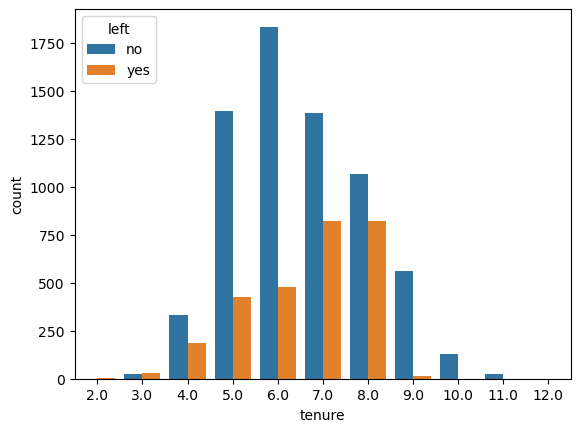

In [4]:
import matplotlib.pyplot as plt
sns.countplot(data=df,x=df['tenure'],hue=df["left"])


In [5]:
def percentage_left_by_tenure(df,low,high):
    df_in = df[(df["tenure"]<=high)&(df["tenure"]>=low)]["left"].value_counts()
    df_out = df[~((df["tenure"]<=high)&(df["tenure"]>=low))]["left"].value_counts()
    return (df_in/(df_in+df_out))["yes"]


In [6]:
percentage_left_by_tenure(df,5,8)

0.9166666666666666

The majority of the staff that leave have been working for the company between 5 - 8 years

About 91% of the staff that left, had been working for the company for between 5 - 8 years.

In [7]:
percentage_left_by_tenure(df,4,8)

0.9834770114942529

In [8]:
percentage_left_by_tenure(df,7,8)

0.5912356321839081

## Key insights - 3

Important features that describe staff who left are their lack of promotions or a bonus, higher than company average performance reviews (0.69), and a tendency to work longer,

In [9]:
df.columns

Index(['department', 'promoted', 'review', 'projects', 'salary', 'tenure',
       'satisfaction', 'bonus', 'avg_hrs_month', 'left'],
      dtype='object')

<AxesSubplot:xlabel='promoted', ylabel='count'>

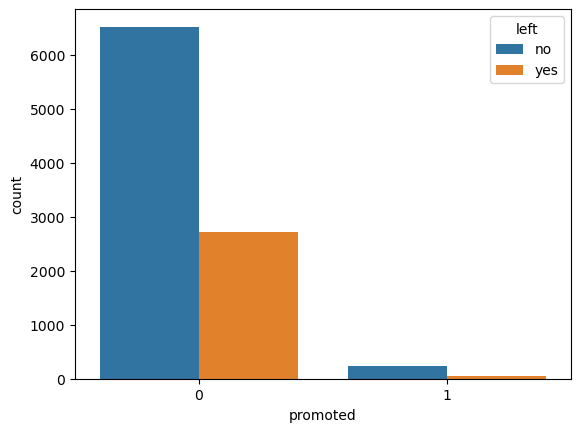

In [10]:
sns.countplot(data=df,x=df['promoted'],hue=df["left"])

<AxesSubplot:xlabel='bonus', ylabel='count'>

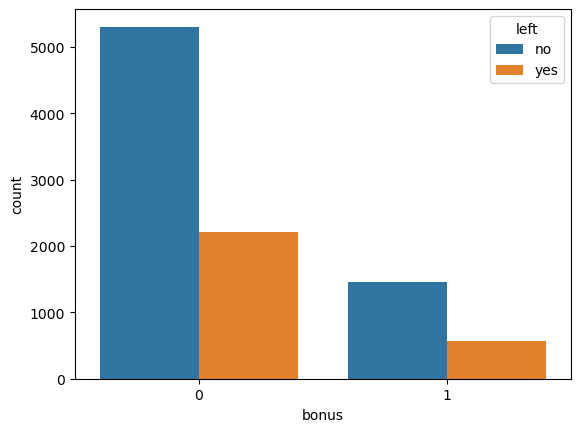

In [11]:
sns.countplot(data=df,x=df['bonus'],hue=df["left"])

<AxesSubplot:xlabel='review', ylabel='avg_hrs_month'>

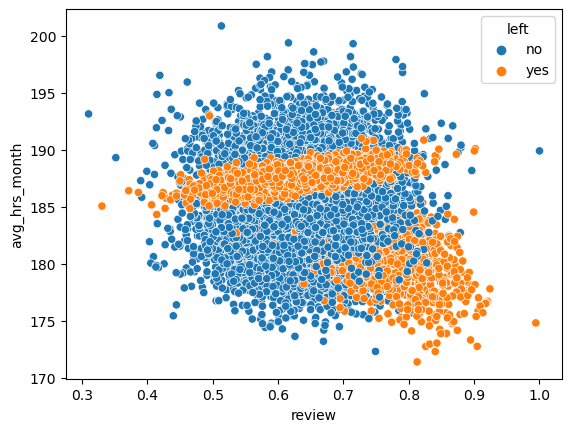

In [12]:
sns.scatterplot(data=df, x="review", y="avg_hrs_month",hue="left")

<AxesSubplot:xlabel='review', ylabel='avg_hrs_month'>

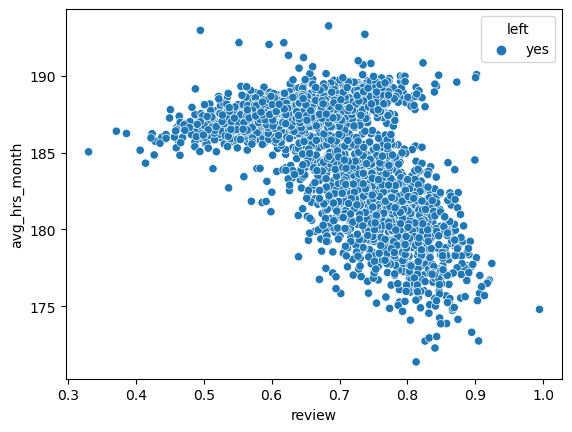

In [13]:
df_yes=df[df["left"]=="yes"]
sns.scatterplot(data=df_yes, x="review", y="avg_hrs_month",hue="left")

In [14]:
def percentage_left_by_review(df,low,high):
    df_in = df[(df["review"]<=high)&(df["review"]>=low)]["left"].value_counts()
    df_out = df[~((df["review"]<=high)&(df["review"]>=low))]["left"].value_counts()
    return (df_in/(df_in+df_out))["yes"]

In [15]:
percentage_left_by_review(df,0.69,1)

0.5283764367816092

In [16]:
def percentage_left_by_avg_hrs_month(df,low,high):
    df_in = df[(df["avg_hrs_month"]<=high)&(df["avg_hrs_month"]>=low)]["left"].value_counts()
    df_out = df[~((df["avg_hrs_month"]<=high)&(df["avg_hrs_month"]>=low))]["left"].value_counts()
    return (df_in/(df_in+df_out))["yes"]

In [17]:
percentage_left_by_avg_hrs_month(df,185,200)

0.5765086206896551

In [18]:
def percentage_left_by_review(df,low_rev,high_rev,low_avg,high_avg):
    df_in = df[(df["review"]<=high_rev)&(df["review"]>=low_rev)|(df["avg_hrs_month"]<=high_avg)&(df["avg_hrs_month"]>=low_avg)]["left"].value_counts()
    df_out = df[~((df["review"]<=high_rev)&(df["review"]>=low_rev)|(df["avg_hrs_month"]<=high_avg)&(df["avg_hrs_month"]>=low_avg))]["left"].value_counts()
    return (df_in/(df_in+df_out))["yes"]

In [19]:
percentage_left_by_review(df,0.7,1,185,190)

0.9324712643678161

## Key insights - 4

The higher performance review ratings are often coupled with lower satisfaction rates, particularly for those who left

<AxesSubplot:xlabel='review', ylabel='satisfaction'>

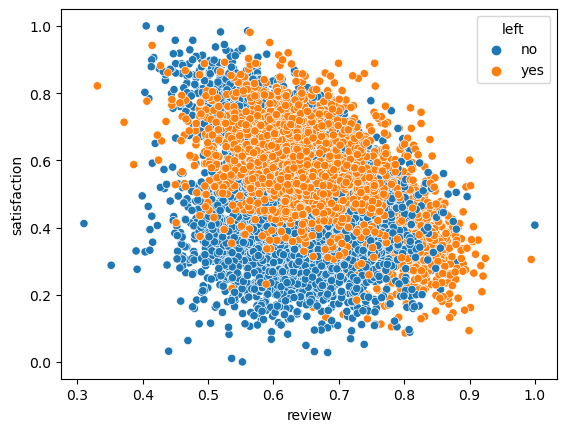

In [20]:
sns.scatterplot(data=df, x="review", y="satisfaction",hue="left")

<AxesSubplot:xlabel='review', ylabel='satisfaction'>

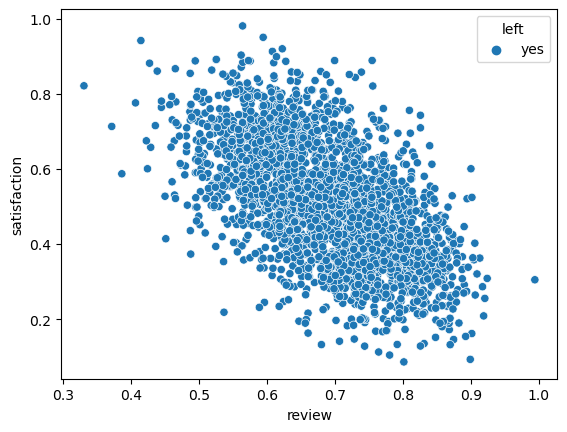

In [21]:
df_yes=df[df["left"]=="yes"]
sns.scatterplot(data=df_yes, x="review", y="satisfaction",hue="left")

The higher performance review ratings are often coupled with lower satisfaction rates,

The lower performance review ratings are often coupled with higher satisfaction rates, 

particularly for those who left

the direction of movement is right and down

## Key insights - 5

This suggests employees who left experience a higher risk of burnout, with few to no benefits,

## Key insights - 6

These findings are consistent across departments, as employees may not be getting the recognition reflected in tangible outcomes, such as promotions, bonuses or career progressions.

## Key insights - 7

The modeling largely reinforce the relationships describe above between staff showing signs of burnout and leaving.

## Key recommendations


Armed with this knowledge, the company can (and should) do more to intervene and reduce turn-over levels to below 20% across departments. 

This could be done via:

Increasing the percentage of promotions given to staff proportionately across departments,

Increasing the number of bonuses issues as way of review performance recognition,

Introduce other benefits that shows recognition for hard work, such as extra days off or paid development opportunities.

Targeted interventions for employees who have only been at the company for a limited amount of time.

<AxesSubplot:xlabel='tenure', ylabel='count'>

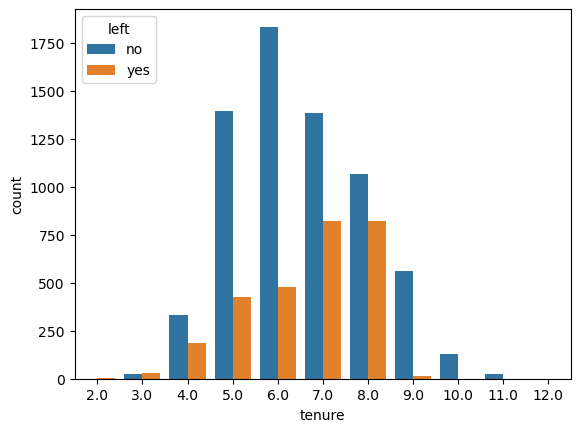

In [22]:
import matplotlib.pyplot as plt
sns.countplot(data=df,x=df['tenure'],hue=df["left"])

In [23]:
df_tenure = df.groupby(['tenure', 'left']).size().reset_index().pivot(columns='tenure', index='left', values=0)
df_tenure

tenure,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
left,,,,,,,,,,,
no,1.0,27.0,332.0,1395.0,1835.0,1386.0,1065.0,564.0,127.0,23.0,1.0
yes,2.0,30.0,186.0,428.0,478.0,823.0,823.0,14.0,NaN,NaN,NaN


<AxesSubplot:xlabel='tenure', ylabel='Count'>

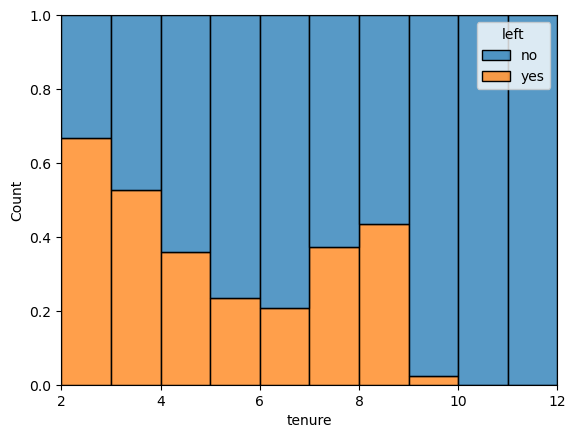

In [24]:
sns.histplot(x='tenure', hue='left', multiple='fill', data=df, binwidth=1)

However, relative attrition rates between different cohorts, appears highest for employees in the early stages of their careers, with 66% of staff leaving in the first 2 years. This decreases over time, but spikes again for those who have been at the company for 8 years.

With little variation in attrition rates between departments, suggesting a more systemic issue in nature

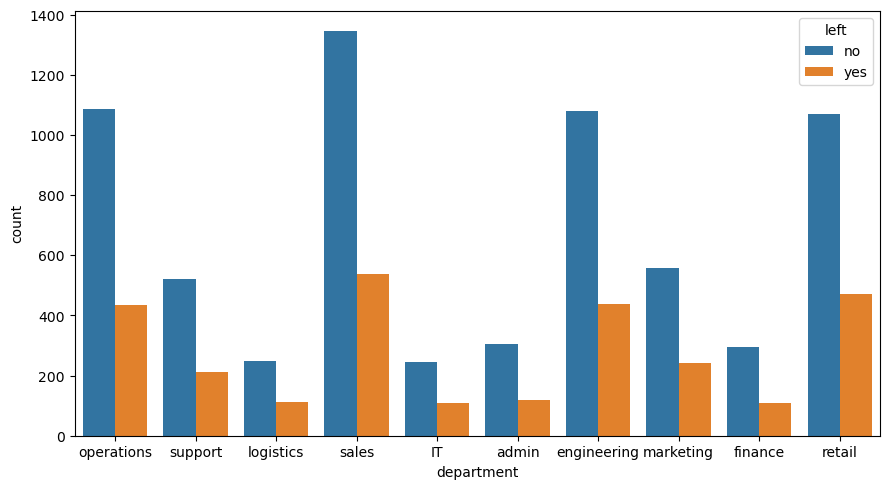

In [59]:
%matplotlib inline
plt.rcParams['figure.figsize']=9,5
sns.countplot(data=df,x=df['department'],hue=df["left"])
plt.show()

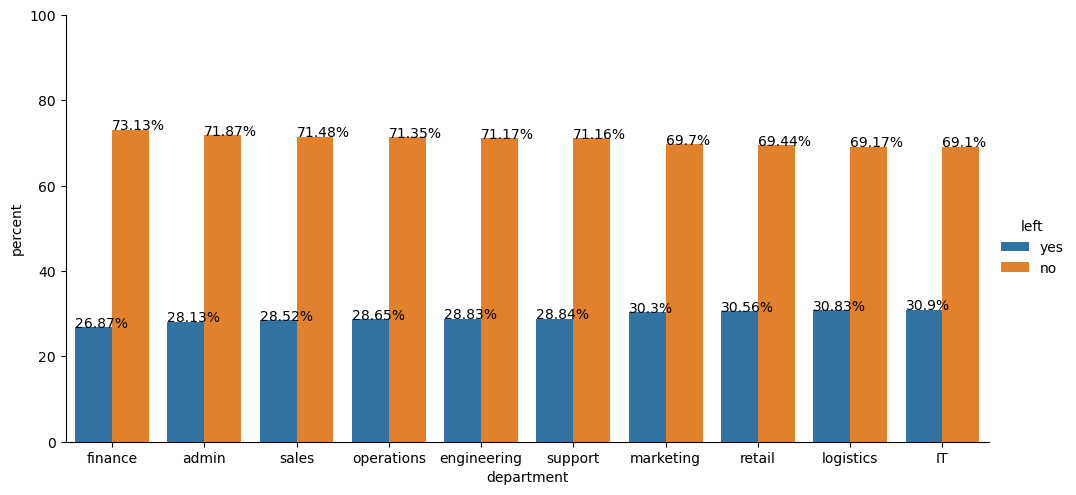

In [65]:

x,y = 'department', 'left'

df1 = df.groupby(x)[y].value_counts(normalize=True).sort_values()
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height = 5, aspect = 2)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

The attrition rate across the 10 company department varies slightly from the overall company attrition rate of 29%. IT, Logistics and Retail have the highest attrition rate of 31%, followed by marketing at 30%. The rest of the department attrition rates are below 30%, with Finance having the lowest turnover rate, of 27%. In absolute terms, Sales, Retail, Engineering and Operations, had the largest number of staff leaving by department (totaling 1,881). Overall, the difference across departments employee turnover is marginal and suggests that reasons for leaving may be more systemic in nature.

In [91]:
import plotly.express as px

fig = px.scatter(df, x="review", y="satisfaction",color="left",facet_col="department",width=1800,
    height=400)
fig.show()

Firstly, a trade off exists between performance review and satisfaction ratings. That is, as performance scores increases across employees, they also tend to have lower satisfaction ratings (see Figure 3). This feature is even more pronounced for employees who have left. Suggesting that, as they work harder to attain higher performance review, they're putting themselves at a higher risk of burnout and leaving. This relationship is also salient across departments.

In [92]:
df.columns

Index(['department', 'promoted', 'review', 'projects', 'salary', 'tenure',
       'satisfaction', 'bonus', 'avg_hrs_month', 'left'],
      dtype='object')

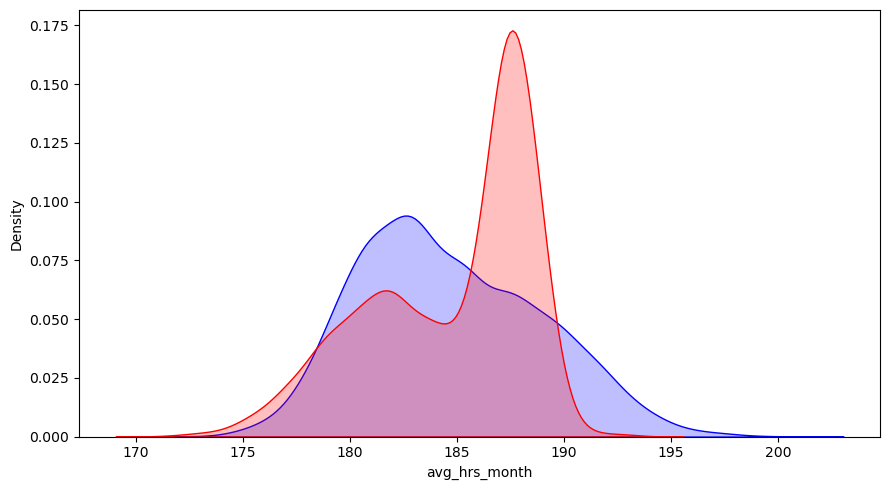

In [101]:

ax=sns.kdeplot(df.loc[(df['left'] == "no"),'avg_hrs_month'] , color='b',shade=True,label='no left')
ax=sns.kdeplot(df.loc[(df['left'] == "yes"),'avg_hrs_month'] , color='r',shade=True, label='left')


...As well as working longer days, and receiving relatively fewer promotions or bonuses...
Similarly, for the group of employee that left, they tended to work more than 8 hours a day on average (assuming a 22 working days in a month), relative to those who stayed (Figure 4). Despite working longer hours, those that left tend to receive proportionately fewer bonuses or promotions (22%) compared to those who stayed (25%).

In [167]:
df[(df["promoted"]==0)&(df["bonus"]==0)&(df["left"]=="no")].shape[0]


5122

In [166]:
df[(df["promoted"]==0)&(df["bonus"]==0)&(df["left"]=="yes")].shape[0]

2168

In [173]:
df[((df["promoted"]!=0)|(df["bonus"]!=0))&(df["left"]=="yes")].shape[0]

616

In [174]:
df[((df["promoted"]!=0)|(df["bonus"]!=0))&(df["left"]=="no")].shape[0]

1634

In [189]:
df["pro_bonus"]=((df["promoted"]==0)&(df["bonus"]==0)).replace([True,False], [0,1])

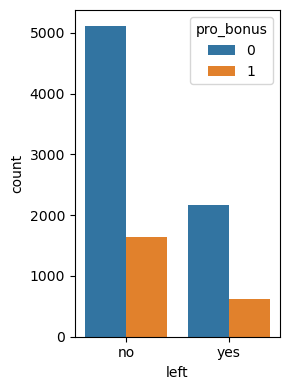

In [202]:
%matplotlib inline
plt.rcParams['figure.figsize']=3,4
sns.countplot(data=df,x='left',hue="pro_bonus")
#sns.countplot(data=df,x=df['promotion'],hue=df["left"])
plt.show()

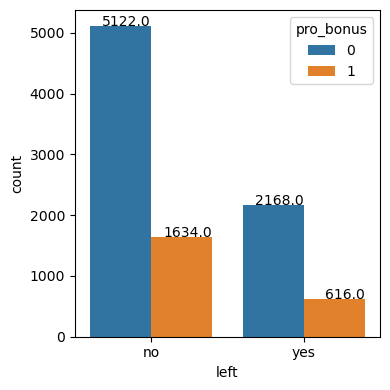

In [222]:
plt.figure(figsize=(4,4))
total = float(len(df))
ax = sns.countplot(x="left", hue="pro_bonus", data=df)
for p in ax.patches:
    percentage = '{:.1f}'.format( p.get_height())
    #percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

<AxesSubplot:xlabel='review', ylabel='Count'>

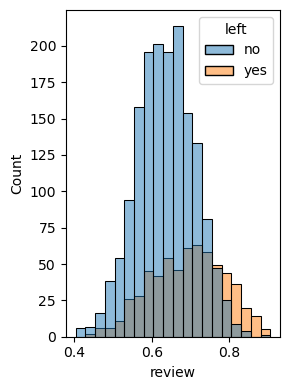

In [242]:
sns.histplot(data = df[df["pro_bonus"]==1], x = "review", kde = False, hue = "left",bins=20)

<AxesSubplot:xlabel='review', ylabel='Count'>

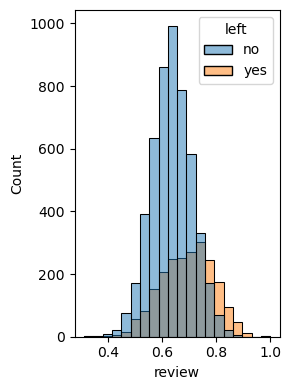

In [243]:
sns.histplot(data = df[df["pro_bonus"]==0], x = "review", kde = False, hue = "left",bins=20)

In [249]:
import plotly.express as px

fig = px.histogram(df, x="review", color="left",facet_col="pro_bonus",width=500,nbins=20,
    height=400)
fig.show()

...As staff who left tend to trade off happiness for hard work to get higher performance reviews than their peers, with little benefits.
A clear connection arises between attaining higher performance review scores (a composite score > 68), not being promoted, and not receiving a bonus. That is, employees who experience all of the above make up about 1,250 (45%) of the total pool of employees who left. With median review performance for this group at 69%, compare to the average of 65% and to those that didn't leave 63%.

While not enough in isolation, these factors in combination, are likely driving the exit rates of staff across departments. As staff who trade off happiness for hard work and higher performance reviews, tend to receive fewer promotions and bonuses relative to their peers.

In [273]:
df["tenure_split"]=(df["tenure"]<=6).replace([True,False], ["2-6 years","7 + years"])

In [258]:
df.columns

Index(['department', 'promoted', 'review', 'projects', 'salary', 'tenure',
       'satisfaction', 'bonus', 'avg_hrs_month', 'left', 'pro_bonus',
       'tenure_split'],
      dtype='object')

In [274]:
import plotly.express as px

fig = px.scatter(df[df["left"]=="yes"], x="review",y="satisfaction", color="tenure_split",width=500,
    height=400)
fig.update_traces(marker_size=2)
fig.show()

In [275]:
import plotly.express as px

fig = px.scatter(df[df["left"]=="yes"], x="review",y="avg_hrs_month", color="tenure_split",width=500,
    height=400)
fig.update_traces(marker_size=2)
fig.show()

Two different groups emerge from employees who left, an older, and younger cohort.
Looking at employees who have left reveals two distinct groups, with distinct characteristics and suggests that company response to the high attrition rate may need to be targeted at two different cohorts. These groups are:

An older cohort in the company, that work longer hours per (8.5), have a lower average review scores and higher satisfaction rates, of which only 2% were promoted.
A younger cohort (6 years of less), who work less hours, attain a much higher performance review score at the expense of satisfaction, of which only 2% were promoted.
This suggests two groups who may be leaving for different reasons, and therefore distinct company responses are likely required in order to implement policies that effectively reduce attrition rates.

Higher review scores increase the odds of staff leaving,
Working longer hours increase the odds of staff leaving, as well as
staff who revive remuneration in the form of promotions or a bonus reduces the odds of staff leaving
The accuracy of this model is 74%, that is - the model about 74% of the time can correctly classify whether an individual will leave or stay. Although this model is simplistic, and can be further developed it helps highlight the importance of staff burnout, in the form of longer hours or captured by higher review scores, and its impact on employees decisions to leave.